Feature engineering 


1.Feature selection
Removing uninformative features

2.Feature extraction
Creating new features from existing features

3.Feature transformation
Modifying existing features to better suit our objectives
Encoding of categorical features as dummies

# Import packages and libraries

In [1]:
import numpy as np
import pandas as pd

In [6]:
# Read in data
df = pd.read_csv('Churn_Modelling.csv')


# EDA - Understanding data 

Data analysis without EDA? Like building a house without blueprints! ️

Exploratory Data Analysis (EDA) is the Sherlock Holmes of Data Science, unraveling mysteries within datasets to uncover hidden insights. This crucial phase involves visualizing, summarizing, and understanding the underlying structure of data. By leveraging statistical profiling, correlation analysis, and visualization techniques, EDA transforms raw data into a narrative, guiding data scientists through the intricate tapestry of patterns and anomalies.

In [7]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [9]:
# Display number of rows, number of columns - To check how large the data is 
df.shape

(10000, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
#Show Key Statistics
#it helps calculate mean , median , mode , min , max 
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [12]:
# Check the columns in the DataFrame
#To know what are the columsn we have in the dataset
columns_list = df.columns
columns_list

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [16]:
# Data Types for our columns

print(df.dtypes)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


# EDA - Checking missing values 

In [13]:
# Check in for missing data 
# Using loop to check the missing data 


for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

RowNumber - 0%
CustomerId - 0%
Surname - 0%
CreditScore - 0%
Geography - 0%
Gender - 0%
Age - 0%
Tenure - 0%
Balance - 0%
NumOfProducts - 0%
HasCrCard - 0%
IsActiveMember - 0%
EstimatedSalary - 0%
Exited - 0%


All good no missing data 

# EDA - Visualizing data 

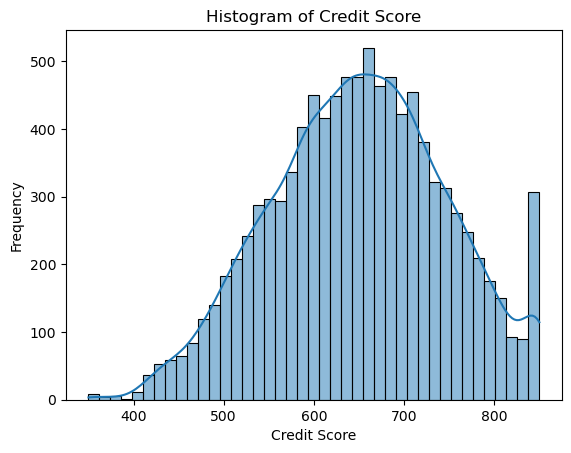

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical variable (e.g., 'CreditScore')
sns.histplot(df['CreditScore'], kde=True)
plt.title('Histogram of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()



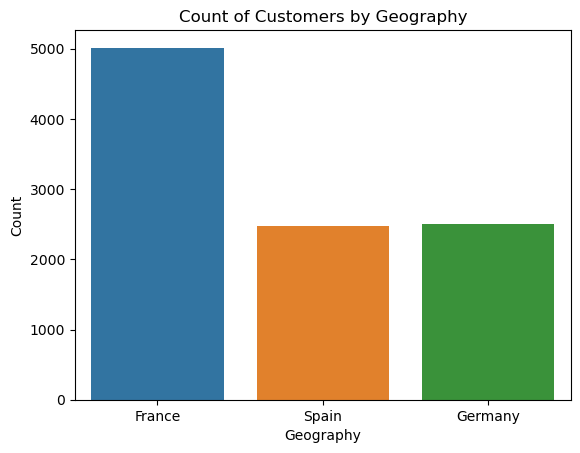

In [19]:
# Bar plot for categorical variable (e.g., 'Geography')
sns.countplot(data=df, x='Geography')
plt.title('Count of Customers by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()


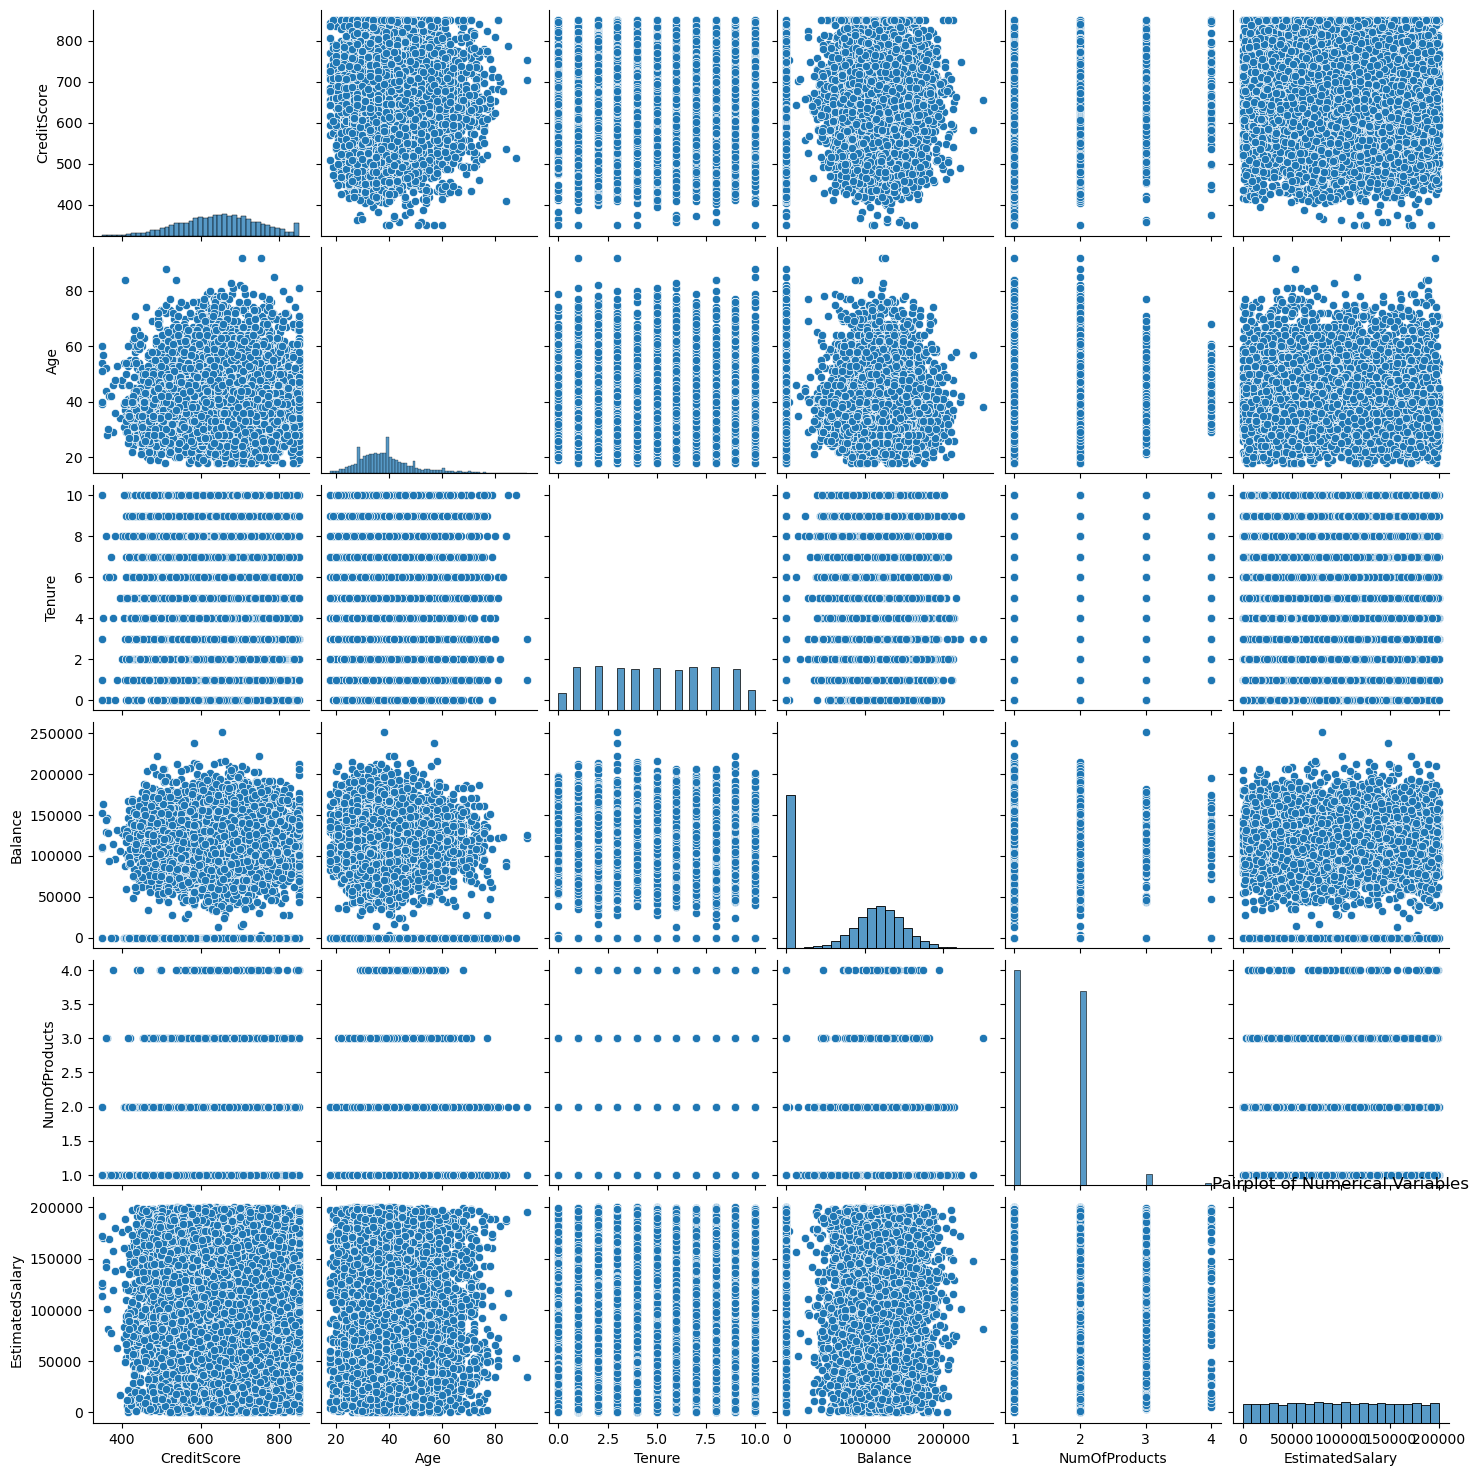

In [20]:

# Pairplot for exploring relationships (numerical variables only)
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
sns.pairplot(df[numerical_columns])
plt.title('Pairplot of Numerical Variables')
plt.show()

# EDA - Data Transformation 

1.Log transformation - Here log transformation is not necessary as the histogram shows a normal distribuition.



2.Scaling/Normalization



3.Encoding categorical variables: 

# EDA - Data Correlation

C:\Users\Owner\AppData\Local\Temp\ipykernel_4896\1733106422.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


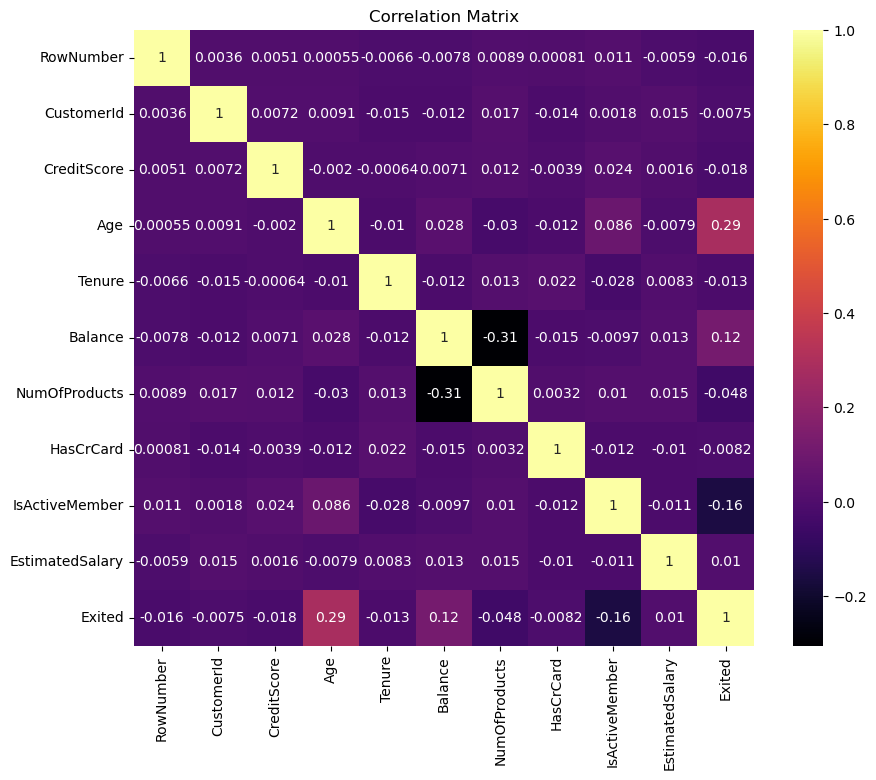

                 RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.003613     0.005145  0.000555 -0.006596   
CustomerId        0.003613    1.000000     0.007245  0.009062 -0.015161   
CreditScore       0.005145    0.007245     1.000000 -0.002000 -0.000645   
Age               0.000555    0.009062    -0.002000  1.000000 -0.010186   
Tenure           -0.006596   -0.015161    -0.000645 -0.010186  1.000000   
Balance          -0.007829   -0.011630     0.007077  0.028466 -0.011851   
NumOfProducts     0.008946    0.017256     0.012318 -0.029773  0.013042   
HasCrCard         0.000806   -0.014022    -0.003949 -0.011702  0.022401   
IsActiveMember    0.011175    0.001808     0.023622  0.085773 -0.028292   
EstimatedSalary  -0.005876    0.014794     0.001609 -0.007941  0.008333   
Exited           -0.016150   -0.007538    -0.018384  0.285134 -0.013080   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.007829   

In [41]:

# Correlation matrix
correlation_matrix = df.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno')
plt.title('Correlation Matrix')
plt.show()

# Display the correlation matrix
print(correlation_matrix)

# EDA - Checking Data Outliers

Checking outliers for Credit score 

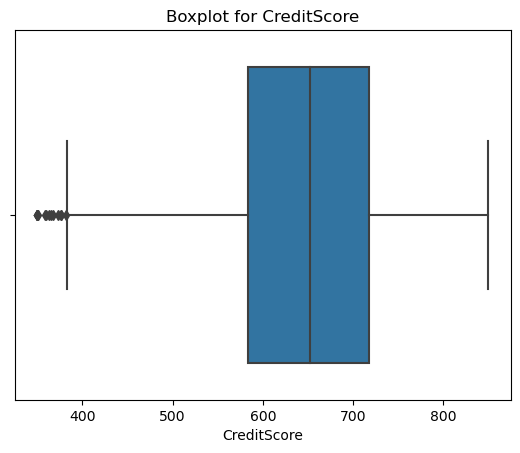

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for outlier detection
sns.boxplot(data=df, x='CreditScore')
plt.title('Boxplot for CreditScore')
plt.show()

# Outlier treatment
Q1 = df['CreditScore'].quantile(0.25)
Q3 = df['CreditScore'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['CreditScore'] >= Q1 - 1.5 * IQR) & (df['CreditScore'] <= Q3 + 1.5 * IQR)]

In [33]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['CreditScore'].quantile(0.25)
Q3 = df['CreditScore'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['CreditScore'] < lower_bound) | (df['CreditScore'] > upper_bound)]

print("Outliers:")
print(outliers)

Outliers:
Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


Checking outliers for EstimatedSalary

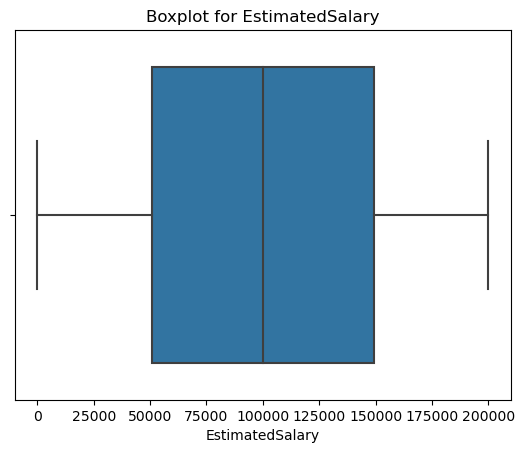

In [35]:
# Boxplot for outlier detection
sns.boxplot(data=df, x='EstimatedSalary')
plt.title('Boxplot for EstimatedSalary')
plt.show()

# Outlier treatment
Q1 = df['EstimatedSalary'].quantile(0.25)
Q3 = df['EstimatedSalary'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['EstimatedSalary'] >= Q1 - 1.5 * IQR) & (df['EstimatedSalary'] <= Q3 + 1.5 * IQR)]

In [39]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['EstimatedSalary'].quantile(0.25)
Q3 = df['EstimatedSalary'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['EstimatedSalary'] < lower_bound) | (df['EstimatedSalary'] > upper_bound)]

print("Outliers:")
print(outliers)

Outliers:
Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


Checking outliers for Balance


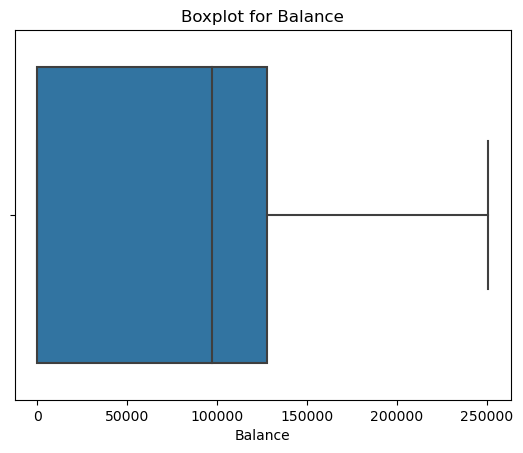

In [37]:
# Boxplot for outlier detection
sns.boxplot(data=df, x='Balance')
plt.title('Boxplot for Balance')
plt.show()

# Outlier treatment
Q1 = df['Balance'].quantile(0.25)
Q3 = df['Balance'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Balance'] >= Q1 - 1.5 * IQR) & (df['Balance'] <= Q3 + 1.5 * IQR)]

In [40]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Balance'].quantile(0.25)
Q3 = df['Balance'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['Balance'] < lower_bound) | (df['Balance'] > upper_bound)]

print("Outliers:")
print(outliers)

Outliers:
Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


# EDA - Pairplot

There are no outliers in any of the column i suspected 

Pairplot 

If the points form a linear pattern, it indicates a strong correlation between the variables.


If the points are scattered randomly, it suggests no correlation between the variables.


If the points form clusters or patterns, it may indicate nonlinear relationships or the presence of groups within the data.

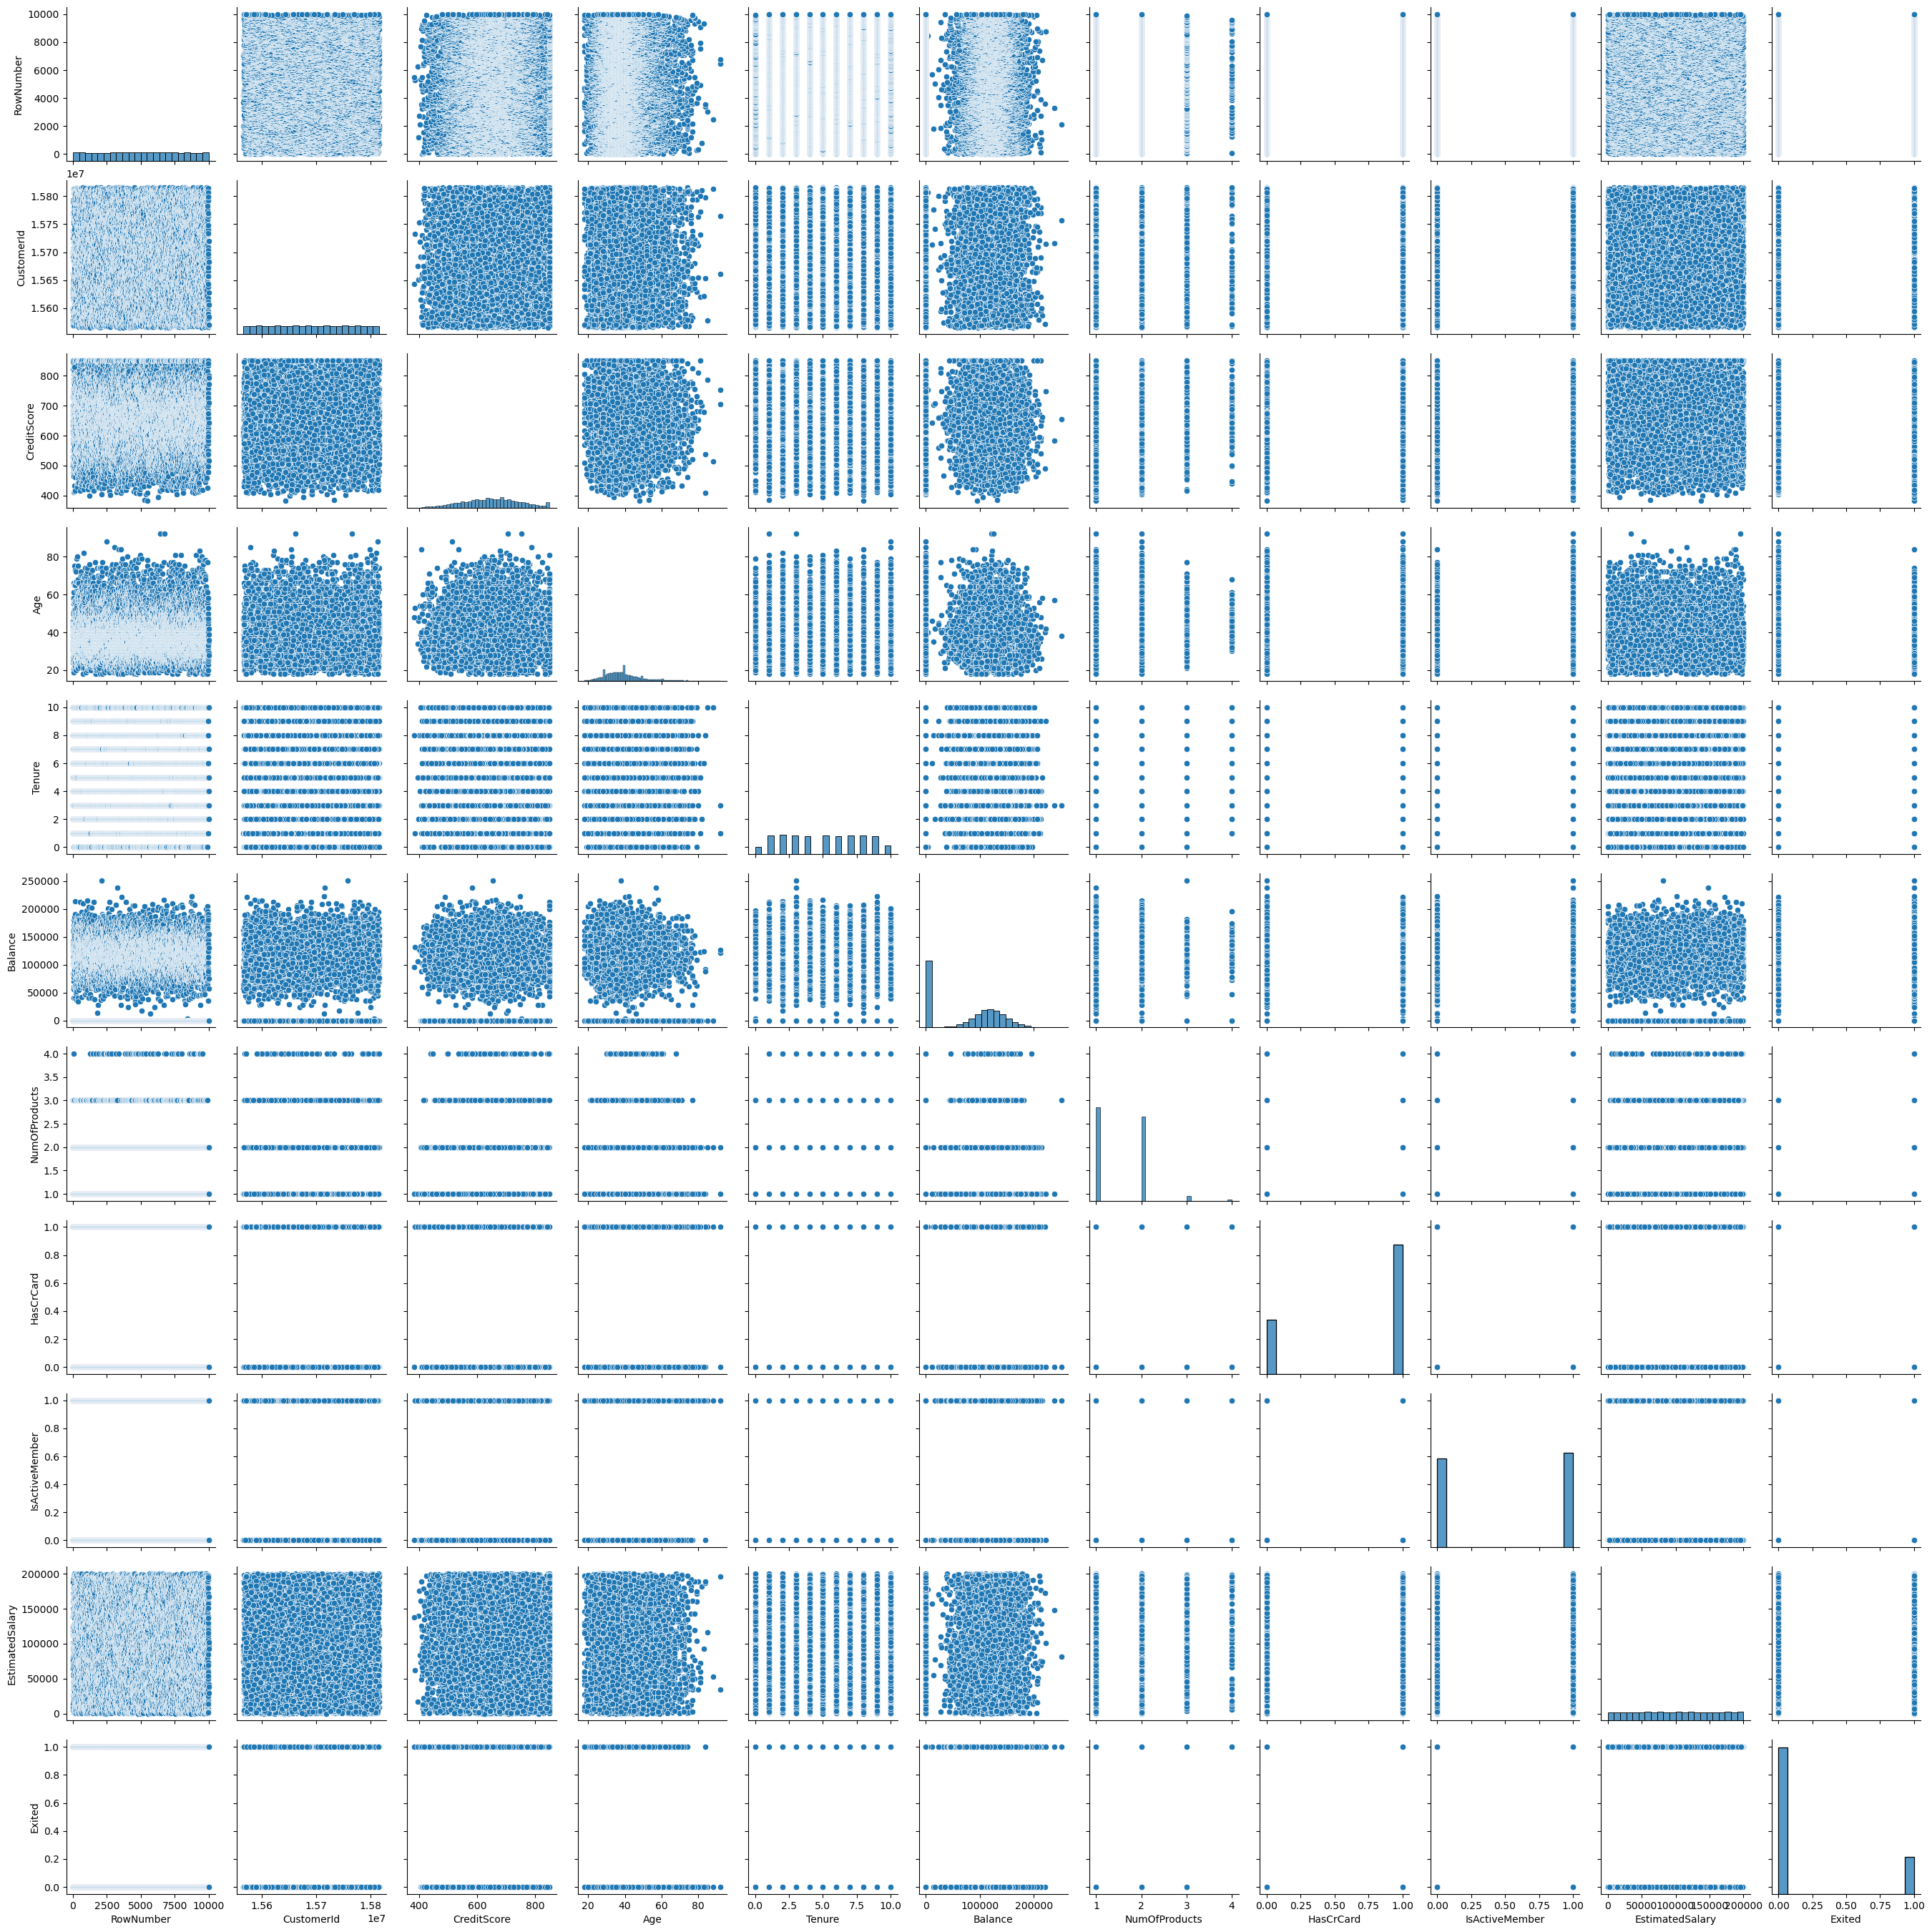

In [47]:
# Pairplot - A pair plot is a powerful visualization tool used in exploratory data analysis (EDA) to understand the relationships between different pairs of variables in a dataset. 




sns.pairplot(df)

plt.show()




In [ ]:
subset_vars = ['Age', 'Balance', 'EstimatedSalary']

# Plotting pairplot for the subset of variables
sns.pairplot(df[subset_vars])
plt.show()

#Here Age = Heavily right skewed 


Interpreting AGE - Right skewed - Positively distributed 


One tails is distributed more than the other 

Positively distributed means = Mode <meadian < mean






1. Means most individuals in the dataset are younger 






2. As the distribution moves towards higher ages, the number of individuals decreases rapidly. 
This means that there are fewer older individuals compared to younger ones.








3. Potential Outliers - The right tail of the distribution may contain some extreme values, which could represent outliers. 
These outliers are individuals whose ages are much higher than the typical age in the dataset.








4. Effect on analysis: The right-skewed age distribution can affect statistical analysis and modeling.
    For example, certain models may assume that data is normally distributed,
    so the skewed distribution may violate this assumption.
    Additionally, outliers in the older age range might disproportionately influence results,
    so it's essential to consider their impact carefully.
    
    
    
    
    
    
    
    
5. Consider transformations: Depending on the analysis, it might be beneficial to transform the age variable to reduce skewness and make it more normally distributed.
    Techniques like log transformation or binning can help mitigate the effects of skewness.


# Perform Log transformation



Why did i choose log transformation ?


Age variable can help in reducing the right skewness observed in the original distribution of ages. When using log transformation.

Log transformation can make the distribution of ages more symmetrical, which is helpful for many statistical techniques that assume normality in the data.

 Log-transformed variables can sometimes improve the performance of certain models by reducing the impact of extreme values and making the relationship with the target variable more linear.

In [68]:
# Log transformation


df['Log_Age'] = np.log(df['Age'])
df

# Since i transformed the age to log , we dont need the age column anymore , so we can drop that to avaoid confusion.

# Drop the non-transformed columns
df = df.drop(columns = ['Age'])

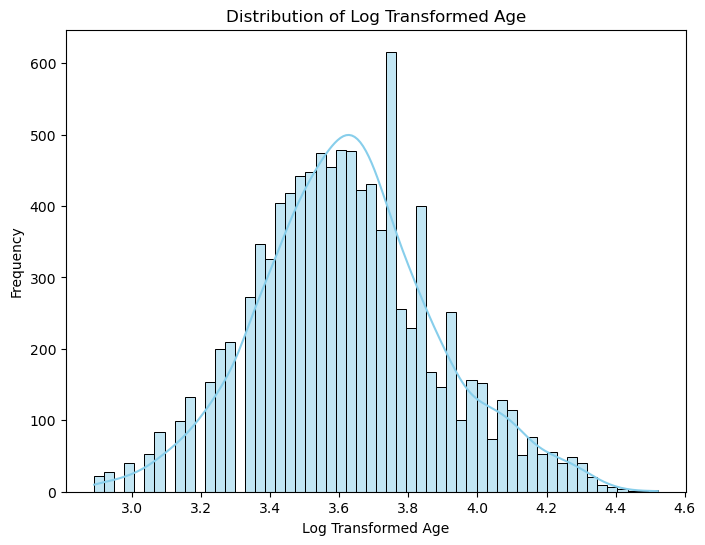

In [64]:
# Set up the figure and axis
plt.figure(figsize=(8, 6))

# Plot the histogram of log-transformed age
sns.histplot(data=df, x='Log_Age', kde=True, color='skyblue')

# Add labels and title
plt.xlabel('Log Transformed Age')
plt.ylabel('Frequency')
plt.title('Distribution of Log Transformed Age')

# Show the plot
plt.show()

So here now after taking the log of age and interpreting the distribuition it seems that the data is more symmetrical

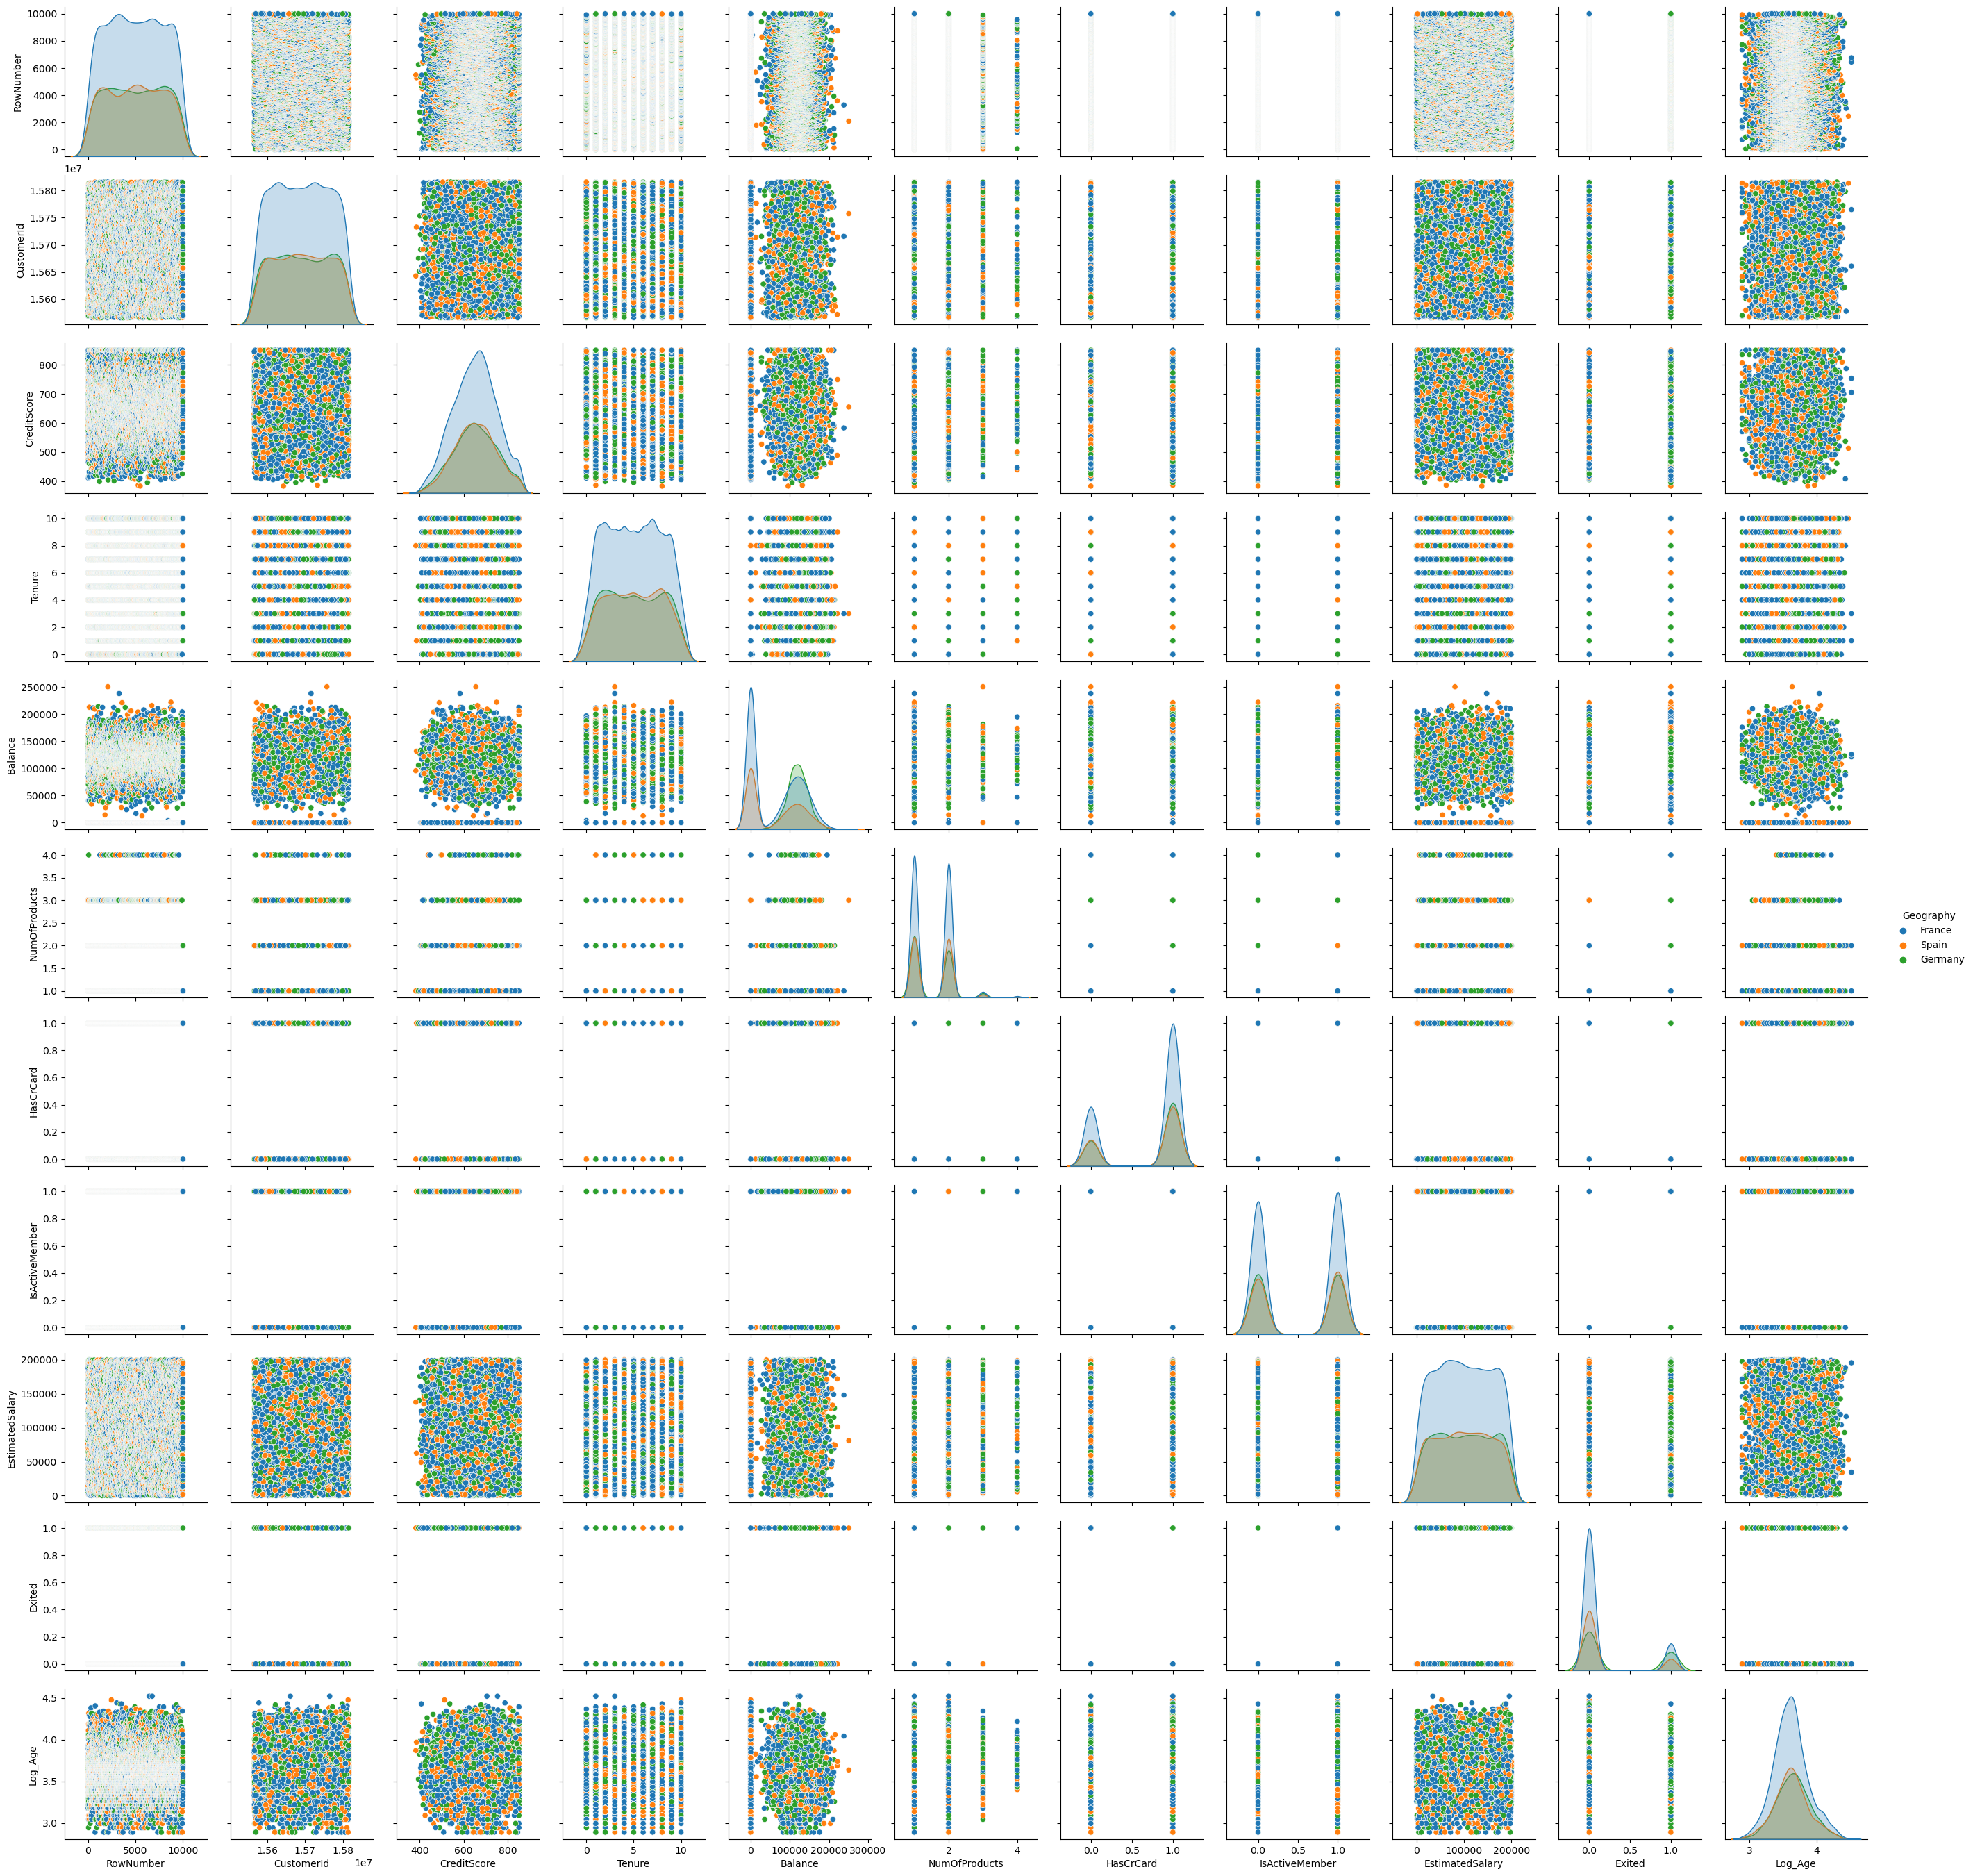

In [69]:
sns.pairplot(df, hue = 'Geography')
plt.show()

# Applying feature engineering 





Feature selection is the process of choosing features to be used for modeling. In practice, feature selection takes place at multiple points in the PACE process.



Steps I followed during feature engineering


PLAN :

1. I Consider what data was available to me
2. Decide on what kind of model I need
3. Decide on a target variable
4. Assembling a collection of features that I think might help predict on your chosen target


Then, during the **Analyze** phase, I perform EDA on the data and reevaluate my  variables for appropriateness. For example, I  my  model handle null values? If not, what do I do with features with a lot of nulls? Perhaps I drop them. This too is feature selection.

Feature selection also occurs during the **Construct** phase. This usually involves building a model, examining which features are most predictive, and then removing the unpredictive features.

There's a lot of work involved in feature selection. In this case, we already have a dataset, and we are not performing thorough EDA on it. However, we can still examine the data to ensure that all the features can reasonably be expected to have predictive potential. 

**Performing feature selection by removing unnessasary column from the dataset**




In [70]:
# Create a new df that drops RowNumber, CustomerId, Surname, and Gender cols
churn_df = df_original.drop(['RowNumber', 'CustomerId', 'Surname', 'Gender'], 
                            axis=1)

In [71]:
churn_df.head()

CreditScore Geography  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619    France   42       2       0.00              1          1   
1          608     Spain   41       1   83807.86              1          0   
2          502    France   42       8  159660.80              3          1   
3          699    France   39       1       0.00              2          0   
4          850     Spain   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  
0               1        101348.88       1  
1               1        112542.58       0  
2               0        113931.57       1  
3               0         93826.63       0  
4               1         79084.10       0

Depending on your data, you may be able to create brand new features from your existing features. Oftentimes, features that you create yourself are some of the most important features selected by your model. Usually this is the case when you have both domain knowledge for the problem you're solving and the right combinations of data. 

For example, suppose you knew that your bank had a computer glitch that caused many credit card transactions to be mistakenly declined in October. It would be reasonable to suspect that people who experienced this might be at increased risk of leaving the bank. If you had a feature that represented each customer's number of credit card transactions each month, you could create a new feature; for example, `OctUseRatio`, where:

$$\text{OctUseRatio} = \frac{\text{num of Oct. transactions}}{\text{avg num monthly transactions}}$$
  </br> 

This new feature would then give you a ratio that might be indicative of whether the customer experienced declined transactions. 

We don't have this kind of specific circumstantial knowledge, and we don't have many features to choose from, but we can create a new feature that might help improve the model.


Let's create a `Loyalty` feature that represents the percentage of each customer's life that they were customers. We can do this by dividing `Tenure` by `Age`:

$$\text{Loyalty} = \frac{\text{Tenure}}{\text{Age}}$$
  </br> 
The intuition here is that people who have been customers for a greater proportion of their lives might be less likely to churn. 

In [73]:
# Create Loyalty variable
churn_df['Loyalty'] = churn_df['Tenure'] / churn_df['Age']

In [74]:
churn_df.head()

CreditScore Geography  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619    France   42       2       0.00              1          1   
1          608     Spain   41       1   83807.86              1          0   
2          502    France   42       8  159660.80              3          1   
3          699    France   39       1       0.00              2          0   
4          850     Spain   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited   Loyalty  
0               1        101348.88       1  0.047619  
1               1        112542.58       0  0.024390  
2               0        113931.57       1  0.190476  
3               0         93826.63       0  0.025641  
4               1         79084.10       0  0.046512

The next step is to transform my features to get them ready for modeling. Different models have different requirements for how the data should be prepared and also different assumptions about their distributions, independence, and so on. You learned about some of these already for linear and logistic regression, and you will continue learning about them as you encounter new modeling techniques.

The models we I will  be building with this data are all classification models, and **classification models generally need categorical variables to be encoded**. My dataset has one categorical feature: `Geography`. 

In [76]:
#Encoding my categorical variable 


# Print unique values of Geography col
churn_df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

There are three unique values: France, Spain, and Germany. Encode this data so it can be represented using Boolean features. We will use a pandas function called `pd.get_dummies()` to do this.

When we call `pd.get_dummies()` on this feature, it will replace the `Geography` column with three new Boolean columns--one for each possible category contained in the column being dummied. 

When we specify `drop_first=True` in the function call, it means that instead of replacing `Geography` with three new columns, it will instead replace it with two columns. We can do this because no information is lost from this, but the dataset is shorter and simpler.  

In this case, we end up with two new columns called `Geography_Germany` and `Geography_Spain`. We don't need a `Geography_France` column, because if a customer's values in `Geography_Germany` and `Geography_Spain` are both 0, we will know they are from France! 

In [77]:
# Dummy encode categorical variables
churn_df = pd.get_dummies(churn_df, drop_first=True)

In [78]:
churn_df.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited   Loyalty  Geography_Germany  \
0               1        101348.88       1  0.047619                  0   
1               1        112542.58       0  0.024390                  0   
2               0        113931.57       1  0.190476                  0   
3               0         93826.63       0  0.025641                  0   
4               1         79084.10       0  0.046512                  0   

   Geography_Spain  
0                0  
1                1  
2                0  
3                0  
4                1